In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Laoding the adult income dataset
df = pd.read_csv(r"C:\Users\tammy\Downloads\archive (3)\adult.csv")

In [3]:
#first 10 rows of the dataset
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [ ]:
#Income is very important in our society as it relates to how much freedom some one has to do what they love and to spend time with family.
#hpothesis: Does income increase as you move up in the social class?

In [5]:
#Noticed some ? in the data, replacing that with Nan
df =df.replace('?', np.nan)

In [6]:
#checking for null values,
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
#dropping missing values
df.dropna(how ='any', inplace =True)

In [8]:
df.shape

(45222, 15)

In [9]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
#checking for duplicate values and droping them
df.duplicated().sum()

47

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.shape

(45175, 15)

In [13]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [14]:
#dropping the columns educational-num, capital-gain and capital-loss 
df.drop(['educational-num', 'capital-gain', 'capital-loss'], axis=1, inplace=True)

In [15]:
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [16]:
#Exploring the data
df['age'].describe()

count    45175.000000
mean        38.556170
std         13.215349
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

<Axes: >

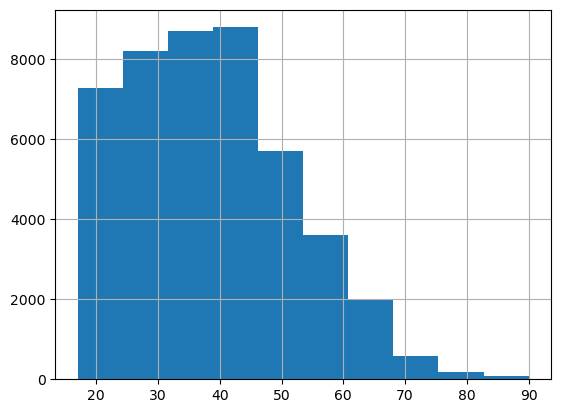

In [17]:
df['age'].hist()

In [20]:
#Finding the total number of persons between 17 to 48(Working class) using the between method
len(df[df['age'].between(17, 65)])

43832

In [22]:
#Isolating the working class age into a new column
df['Age_17_to_65'] = df['age'].apply(lambda x: x if 17 <= x <= 65 else None)

C:\Users\tammy\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


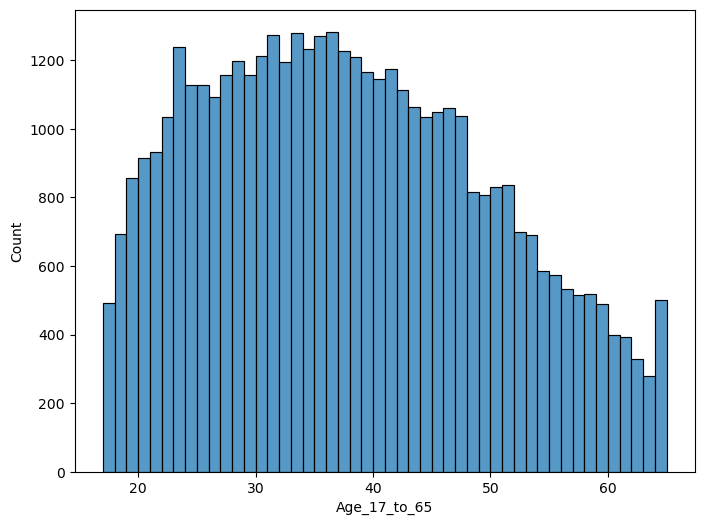

In [32]:
#See the new histogram for age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age_17_to_65'])
plt.show()

In [27]:
# Filter the DataFrame to keep only rows where 'Age_17_to_65' is not NaN
filtered_data = df.dropna(subset=['Age_17_to_65'])

In [28]:
filtered_data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Age_17_to_65
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,25.0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,38.0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,28.0
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,44.0
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K,34.0


In [29]:
#cheecking the distribution of working class
filtered_data['workclass'].describe()

count       43832
unique          7
top       Private
freq        32536
Name: workclass, dtype: object

C:\Users\tammy\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


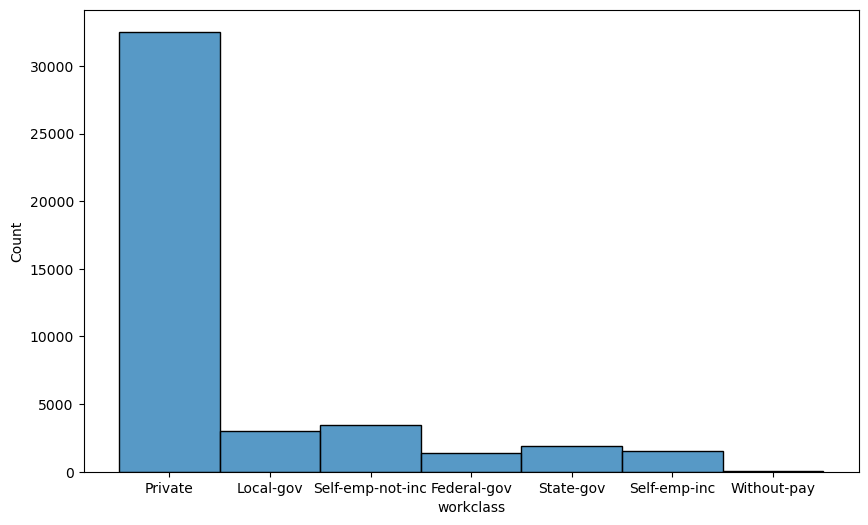

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['workclass'])
plt.show()

In [38]:
#In other to see how income correlates with age, I will convert to a float
df['income'].replace(to_replace=['<=50K', '>50K'], value=[0, 1])

0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 45175, dtype: int64

In [40]:
#checking the correlation between working age and income 
correlation = filtered_data['Age_17_to_65'].corr(filtered_data['income'])
print(correlation)

0.27490881288631425


In [42]:
#Checking the correlation between hours worked and income
correlation1 = filtered_data['hours-per-week'].corr(filtered_data['income'])
print(correlation1)

0.22848531764494887


In [45]:
#Which workclass gets the highest salary?
filtered_data.groupby('workclass')['income'].mean().sort_values(ascending=False)

workclass
Self-emp-inc        0.555483
Federal-gov         0.393193
Local-gov           0.301736
Self-emp-not-inc    0.285386
State-gov           0.267472
Private             0.218650
Without-pay         0.117647
Name: income, dtype: float64

In [49]:
#Who has better chance to get salary >50K, male or female?
filtered_data.groupby('gender')['income'].mean().sort_values(ascending=False)

gender
Male      0.313370
Female    0.114774
Name: income, dtype: float64

In [48]:
#How many hours per week to work get more income?
filtered_data.groupby('hours-per-week')['income'].mean().sort_values(ascending=False)
#hours per week doesn't show much effect on income as seen below that more hours does not imply more income 

hours-per-week
74    1.000000
69    1.000000
76    0.750000
61    0.750000
67    0.666667
        ...   
88    0.000000
87    0.000000
82    0.000000
81    0.000000
11    0.000000
Name: income, Length: 96, dtype: float64

In [50]:
#which of the sectors are making more than 50k>?
filtered_data.groupby('workclass')['income'].mean().sort_values(ascending=False)
#Self employed makes more than 50k when compared to the other class.

workclass
Self-emp-inc        0.555483
Federal-gov         0.393193
Local-gov           0.301736
Self-emp-not-inc    0.285386
State-gov           0.267472
Private             0.218650
Without-pay         0.117647
Name: income, dtype: float64

In [51]:
#which race makes more than 50k?
filtered_data.groupby('race')['income'].mean().sort_values(ascending=False)
#According to the data asians make more than 50k followed by whites

race
Asian-Pac-Islander    0.287736
White                 0.263607
Other                 0.128205
Black                 0.126362
Amer-Indian-Eskimo    0.122970
Name: income, dtype: float64

In [52]:
#Which occupation earns more than 50k?
filtered_data.groupby('occupation')['income'].mean().sort_values(ascending=False)
#People with managerial positons earns more 

occupation
Exec-managerial      0.481725
Prof-specialty       0.451253
Protective-serv      0.323372
Tech-support         0.291518
Armed-Forces         0.285714
Sales                0.267397
Craft-repair         0.226644
Transport-moving     0.208537
Adm-clerical         0.136668
Machine-op-inspct    0.123503
Farming-fishing      0.118168
Handlers-cleaners    0.065174
Other-service        0.040966
Priv-house-serv      0.015385
Name: income, dtype: float64

In [54]:
#do people that are educated  earn more than 50k?
filtered_data.groupby('education')['income'].mean().sort_values(ascending=False)
#yes the higher the education the higher the pay

education
Prof-school     0.764468
Doctorate       0.736328
Masters         0.560197
Bachelors       0.419464
Assoc-acdm      0.262097
Assoc-voc       0.258333
Some-college    0.200599
HS-grad         0.164421
12th            0.072954
10th            0.069767
7th-8th         0.065248
9th             0.055988
11th            0.051932
5th-6th         0.050000
1st-4th         0.039024
Preschool       0.015385
Name: income, dtype: float64

In [55]:
#how does marital status affect income?
filtered_data.groupby('marital-status')['income'].mean().sort_values(ascending=False)
#Married couples tend to  earn more 

marital-status
Married-civ-spouse       0.459583
Married-AF-spouse        0.437500
Divorced                 0.104683
Married-spouse-absent    0.093458
Widowed                  0.093275
Separated                0.070866
Never-married            0.047326
Name: income, dtype: float64

In [ ]:
#Answer to the hypothesis: Yes income increase as you go up the social class.
#Next step is to convert the categorical columns to dummy variables or numeric. Then afterwards apply logistic regression model to predict the probability of earning >$50K based on factors like education, occupation, hours-per-week, etc. 